# Robustness Analysis
##  cooppr model
### Imports

In [2]:
%matplotlib inline
import pickle
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
from IPython.display import display
import matplotlib
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
sns.set_palette('colorblind')
sns.set_style("ticks")
sns.set_context("paper")
linewidthin = 3.68153
textwidthin = 7.50146

p = 0.00004
number_of_nodes = 100000
seed = 1
G = G = nx.read_gpickle('erdos_p_{}_nodes_{}_seed_{}.gpkl'.format(p, number_of_nodes, seed))

### no in threshold 1

In [5]:
df = pd.read_pickle('data/percolation2d_last_maxr_cooppr_pr_vs_cd_no_in_threshold1_no_in_threshold1.pkl')
df = df.rename(columns={'AlD':'AllD', 'Proyection': 'Projection', 'Defections': 'RDC'})
df['f'] = df['AllD'] / number_of_nodes
df['SGC'] = df['gigant component size'] / number_of_nodes
df['SA'] = df['size of active nodes'] / number_of_nodes
df['isna'] = df.SA.isnull()
df['unit'] = df['seed'] + 0.1*df['network_seed']
df = df.dropna()
print(df.isnull().sum())
display(df[df['AllD']==1].pivot_table(index='Projection', columns='Paranoia',
                                      values='seed', aggfunc=len, margins=True))
display(df.head())
print(df.AllD.min())
print(df.f.min())

AllD                     0
Cooperations             0
RDC                      0
Parameters               0
Paranoia                 0
Prior                    0
Projection               0
Time                     0
gigant component size    0
network_seed             0
seed                     0
size of active nodes     0
f                        0
SGC                      0
SA                       0
isna                     0
unit                     0
dtype: int64


Paranoia    0.0  0.23358425289  0.341760094529  All
Projection                                         
0.0          50             50              50  150
0.25         50             50              50  150
0.5          50             50              50  150
0.75         50             50              50  150
All         200            200             200  600

AllD  Cooperations       RDC                  Parameters  Paranoia  \
0     0      1.000000  0.000000  Beta(10, 2), Paranoia 0.23  0.233584   
1     1      0.999990  0.000010  Beta(10, 2), Paranoia 0.23  0.233584   
2   101      0.997899  0.002101  Beta(10, 2), Paranoia 0.23  0.233584   
3   201      0.995738  0.004262  Beta(10, 2), Paranoia 0.23  0.233584   
4   301      0.993591  0.006409  Beta(10, 2), Paranoia 0.23  0.233584   

     Prior  Projection  Time  gigant component size  network_seed  seed  \
0  (10, 2)        0.75  1999                      0             4    10   
1  (10, 2)        0.75  1999                      3             4    10   
2  (10, 2)        0.75  1999                     14             4    10   
3  (10, 2)        0.75  1999                     14             4    10   
4  (10, 2)        0.75  1999                     14             4    10   

   size of active nodes        f      SGC       SA   isna  unit  
0                     0  0.00000  0.00000  0.00000  False  10.4  
1                     3  0.00001  0.00003  0.00003  False  10.4  
2                   521  0.00101  0.00014  0.00521  False  10.4  
3                  1053  0.00201  0.00014  0.01053  False  10.4  
4                  1580  0.00301  0.00014  0.01580  False  10.4

0
0.0


(0, 1.1)

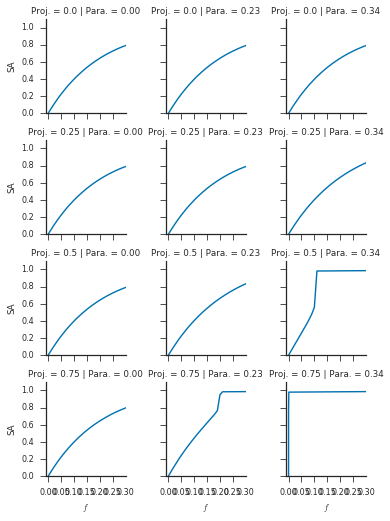

In [7]:
space=.2
g = sns.FacetGrid(df, col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='unit', value='SA')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', 'SA')
g.set_titles("Proj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
#plt.savefig('figures/RDC_vs_f_maxr.pdf')
g.axes[0,0].set_xlim([-0.01, 0.3])
g.axes[0,0].set_ylim([0, 1.1])
#plt.savefig('figures/RDC_vs_f_maxr_zoom.pdf')

In [10]:
space=.2
g = sns.FacetGrid(df.query('f<0.3'), col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='unit', value='SGC')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', 'SGC')
g.set_titles("Proj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
#plt.savefig('figures/RDC_vs_f_maxr.pdf')
g.axes[0,0].set_xlim([-0.01, 0.3])
g.axes[0,0].set_ylim([0, 1.1])
#plt.savefig('figures/RDC_vs_f_maxr_zoom.pdf')

(0, 1.1)

In [37]:
sns.set_palette('colorblind')
current_palette = sns.color_palette()
sns.set_context("paper", font_scale=.75)
print(df.Paranoia.unique())
subdf = df.query('(Paranoia==0 & Projection==0) or (Projection==0.75 & Paranoia> 0.23 & Paranoia < 0.3) | (Projection==0.75 & Paranoia>0.3)')
subdf['condition'] = 100 * subdf['Projection'] + np.round(subdf['Paranoia'], 2)
subdf = subdf.sort_values('condition')

# figure and grid
plt.figure(figsize=(linewidthin, 0.7*linewidthin))
grid = plt.GridSpec(6, 6, wspace=200, hspace=0, )


sgc_mean = subdf.pivot_table(index='f', columns='condition', values='SGC').reset_index()

# bottom inset
ax = plt.subplot(grid[4:, 4:])
sns.tsplot(subdf, time='f', unit='unit', value='SGC', condition='condition',
           color=current_palette, ax=ax,legend=True)
ax.annotate("", xy=(0.04, 0.03), xycoords='data', xytext=(0.04, 0.15), textcoords='data',
            arrowprops=dict(color='black', width=0.75, headwidth=2, headlength=4),
            )

ax.scatter(sgc_mean.loc[65, 'f'], sgc_mean.loc[65, 75.23], c=current_palette[1])
ax.set_ylim([0, 1.01])
ax.set_xlim([-0.01, 0.09])
ax.set_xlabel('f')
ax.set_ylabel('$S_{gc}$')

ax.legend(['(1)', '(2)','(3)'], bbox_to_anchor=(0.95, 0.28), bbox_transform=plt.gcf().transFigure)
ax.set_xticks([0, 0.04, 0.08])


sa_mean = subdf.pivot_table(index='f', columns='condition', values='SA').reset_index()

# top inset
ax = plt.subplot(grid[0:2, 4:], sharex=ax)
sns.tsplot(subdf, time='f', unit='unit', value='SA', condition='condition', color=current_palette, n_boot=2, ax=ax, legend=True)
ax.scatter(sa_mean.loc[65, 'f'], sa_mean.loc[65, 75.23], c=current_palette[1])
ax.legend(['(1)', '(2)','(3)'], loc='upper right', bbox_to_anchor=(.95, 0.8), bbox_transform=plt.gcf().transFigure)
ax.set_xlim([-0.05, 0.3])
ax.set_xlabel('$f$')
ax.set_ylabel('$S_a$')
ax.set_ylim([-0, 1.01])
ax.set_xticks([0, 0.1, 0.2, 0.3])
#ax.plot([0, 0.3], [0, 0.3], '--')


sns.despine()



import matplotlib.patches as mpatches
pv = df.pivot_table(index='Projection', columns='Paranoia', values='RDC')
for (projection, paranoia), subdf in df.groupby(['Projection', 'Paranoia']):
    pepe = pd.pivot_table(subdf, index='f', values=['RDC', 'SGC', 'SA']).reset_index()
    pepe['diff'] = pepe['SA'].diff() / pepe['f'].diff()
    pepe['jump'] = pepe['diff'] > 10
    #print(projection, paranoia, pepe.query('f<0.01')[['f', 'SA']])
    if not pepe.iloc[2:]['jump'].any():
        if (pepe.loc[pepe['f']>0, 'SA'] > 0.2).all():
            pv.loc[projection, paranoia] = 'High Defection'
        else:
            pv.loc[projection, paranoia] = 'High Cooperation'
    else:
        pv.loc[projection, paranoia] = 'Bistable'
    if (pepe.loc[pepe['f']>0, 'SA'] > 0.2).all():
        pv.loc[projection, paranoia] = 'High Defection'

pepe = pv.unstack().reset_index()
pepe = pepe.rename(columns={0: 'System'})
pars = {k: v + 0.5 for v, k in enumerate(np.unique(pepe['Paranoia']))}
pepe['Paranoia'] = pepe['Paranoia'].map(pars)

pro = {k: 3.5- v for v, k in enumerate(np.unique(pepe['Projection']))}
pepe['Projection'] = pepe['Projection'].map(pro)
aspect = 0.7
frac = 0.55
#fig = plt.figure(figsize=(linewidthin, linewidthin*aspect))
#ax = fig.add_axes([0.16, 0.2, frac, frac/aspect])
grouped = pepe.groupby('System')

pad = 0.17
ad = 0.02
aspect = 1
#sns.set_context('paper', font_scale=0.75)
ax0 = plt.subplot(grid[1:,:4])
#ax0 = fig.add_axes()#[pad, 7./24+pad/aspect, 2./3-pad-ad, 2./3-(pad+ad)/aspect]
for sname in ['High Cooperation', 'Bistable', 'High Defection']:
    sgr = grouped.get_group(sname)
    ax0.plot(sgr['Paranoia'], sgr['Projection'], marker='s', label=sname, linestyle='None', markersize=27)
plt.xlim([0, 4])
plt.ylim([0, 4])
lgd = plt.legend(loc=10, markerscale=0.2, bbox_to_anchor=(0.3, 1.1), ncol=3, columnspacing=0)
plt.xticks([0.5, 1.5, 2.5, 3.5], [0.0, 0.23, 0.34])
plt.yticks([0.5, 1.5, 2.5, 3.5], [0.75, 0.5, 0.25, 0]);
plt.xlabel('Paranoia')
plt.ylabel('Projection');

fancybox = mpatches.FancyBboxPatch([.05, 3.05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([1.05, .05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([2.05, .05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)

ax0.annotate("(1)", xy=(0.04, 0.03), xytext=(0.38, 3.43), textcoords='data')
ax0.annotate("(2)", xy=(0.04, 0.03), xytext=(1.38, 0.43), textcoords='data')
ax0.annotate("(3)", xy=(0.04, 0.03), xytext=(2.38, 0.43), textcoords='data')

sns.despine(left=True, bottom=True, ax=ax0)
#plt.tight_layout()

plt.savefig('figures/stabilitymap_cooppr_robust1.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

[ 0.23358425  0.34176009  0.        ]


/home/andres/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### no in thresold 2

In [3]:
df1 = pd.read_pickle('data/percolation2d_last_maxr_cooppr_pr_vs_cd_no_in_threshold1_no_in_threshold2.pkl')
df2 = pd.read_pickle('data/percolation2d_last_maxr_cooppr_pr_vs_cd_no_in_threshold1_no_in_threshold22.pkl')
df3 = pd.read_pickle('data/percolation2d_last_maxr_cooppr_pr_vs_cd_no_in_threshold23.pkl')
df4 = pd.read_pickle('data/percolation2d_last_maxr_cooppr_pr_vs_cd_no_in_threshold24.pkl')
df = pd.concat([df1, df2, df3, df4])
df = df.rename(columns={'AlD':'AllD', 'Proyection': 'Projection', 'Defections': 'RDC'})
df['f'] = df['AllD'] / number_of_nodes
df['SGC'] = df['gigant component size'] / number_of_nodes
df['SA'] = df['size of active nodes'] / number_of_nodes
df['isna'] = df.SA.isnull()
df['unit'] = df['seed'] + 0.1 * df['network_seed']
df = df.dropna()
print(df.isnull().sum())
display(df[df['AllD']==1].pivot_table(index='Projection', columns='Paranoia',
                                      values='seed', aggfunc=len, margins=True))
display(df.head())
print(df.AllD.min())
print(df.f.min())

AllD                     0
Cooperations             0
RDC                      0
Parameters               0
Paranoia                 0
Prior                    0
Projection               0
Time                     0
gigant component size    0
network_seed             0
seed                     0
size of active nodes     0
f                        0
SGC                      0
SA                       0
isna                     0
unit                     0
dtype: int64


Paranoia    0.0  0.249407244819   All
Projection                           
0.0          50              50   100
0.25         50              50   100
0.5          50              50   100
0.75         50              50   100
1.0          50              50   100
1.25         50              50   100
1.5          50              50   100
1.75         50              50   100
2.0          50              50   100
2.25         50              50   100
2.5          50              50   100
2.75         50              50   100
3.0          50              50   100
All         650             650  1300

AllD  Cooperations       RDC                  Parameters  Paranoia  \
0     0      1.000000  0.000000  Beta(11, 1), Paranoia 0.25  0.249407   
1     1      0.999950  0.000050  Beta(11, 1), Paranoia 0.25  0.249407   
2   101      0.997831  0.002169  Beta(11, 1), Paranoia 0.25  0.249407   
3   201      0.995716  0.004284  Beta(11, 1), Paranoia 0.25  0.249407   
4   301      0.993752  0.006248  Beta(11, 1), Paranoia 0.25  0.249407   

     Prior  Projection  Time  gigant component size  network_seed  seed  \
0  (11, 1)         1.0  1999                      0             3     1   
1  (11, 1)         1.0  1999                     11             3     1   
2  (11, 1)         1.0  1999                     14             3     1   
3  (11, 1)         1.0  1999                     14             3     1   
4  (11, 1)         1.0  1999                     14             3     1   

   size of active nodes        f      SGC       SA   isna  unit  
0                     0  0.00000  0.00000  0.00000  False   1.3  
1                    11  0.00001  0.00011  0.00011  False   1.3  
2                   535  0.00101  0.00014  0.00535  False   1.3  
3                  1054  0.00201  0.00014  0.01054  False   1.3  
4                  1545  0.00301  0.00014  0.01545  False   1.3

0
0.0


In [103]:
space=.2
g = sns.FacetGrid(df, col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='unit', value='SA')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', 'SA')
g.set_titles("Proj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
#plt.savefig('figures/RDC_vs_f_maxr.pdf')
#g.axes[0,0].set_xlim([-0.01, 0.3])
g.axes[0,0].set_ylim([0, 1.1])
#plt.savefig('figures/RDC_vs_f_maxr_zoom.pdf')

(0, 1.1)

In [6]:
space=.2
g = sns.FacetGrid(df.query('f<0.4'), col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='unit', value='SGC')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', 'SGC')
g.set_titles("Proj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
#plt.savefig('figures/RDC_vs_f_maxr.pdf')
g.axes[0,0].set_xlim([-0.01, 0.4])
g.axes[0,0].set_ylim([0, 1.1])
#plt.savefig('figures/RDC_vs_f_maxr_zoom.pdf')

(0, 1.1)

In [8]:
sns.set_palette('colorblind')
current_palette = sns.color_palette()
sns.set_context("paper", font_scale=.75)
print(df.Paranoia.unique())
df2 = df.query('Projection % 0.5 == 0')
subdf = df2.query('(Paranoia==0 & Projection==0) or (Projection==2 & Paranoia> 0.23) | (Projection==3 & Paranoia > 0.24)')
subdf['condition'] = 100 * subdf['Projection'] + np.round(subdf['Paranoia'], 2)
subdf = subdf.sort_values('condition')

# figure and grid
plt.figure(figsize=(linewidthin, 0.7*linewidthin))
grid = plt.GridSpec(6, 6, wspace=200, hspace=0, )


sgc_mean = subdf.pivot_table(index='f', columns='condition', values='SGC').reset_index()

# bottom inset
ax = plt.subplot(grid[4:, 4:])
sns.tsplot(subdf.query('Projection<3'), time='f', unit='unit', value='SGC', condition='condition',
           color=current_palette, ax=ax,legend=True)
ax.annotate("", xy=(0.04, 0.03), xycoords='data', xytext=(0.04, 0.15), textcoords='data',
            arrowprops=dict(color='black', width=0.75, headwidth=2, headlength=4),
            )

ax.scatter(sgc_mean.loc[35, 'f'], sgc_mean.loc[35, 200.25], c=current_palette[1])
ax.set_ylim([0, 1.01])
ax.set_xlim([-0.01, 0.09])
ax.set_xlabel('f')
ax.set_ylabel('$S_{gc}$')

ax.legend(['(1)', '(2)'], bbox_to_anchor=(0.95, 0.38), bbox_transform=plt.gcf().transFigure)
ax.set_xticks([0, 0.04, 0.08])


sa_mean = subdf.pivot_table(index='f', columns='condition', values='SA').reset_index()

# top inset
ax = plt.subplot(grid[0:2, 4:], sharex=ax)
sns.tsplot(subdf, time='f', unit='unit', value='SA', condition='condition', color=current_palette, n_boot=2, ax=ax, legend=True)
ax.scatter(sa_mean.loc[35, 'f'], sa_mean.loc[35, 200.25], c=current_palette[1])
ax.legend(['(1)', '(2)','(3)'], loc='upper right', bbox_to_anchor=(.95, 0.89), bbox_transform=plt.gcf().transFigure)
ax.set_xlim([-0.01, 0.09])
ax.set_xlabel('$f$')
ax.set_ylabel('$S_a$')
ax.set_ylim([-0, 1.01])
ax.set_xticks([0, 0.04, 0.08])
#ax.plot([0, 0.09], [0, 0.09], '--')


sns.despine()



import matplotlib.patches as mpatches
pv = df2.pivot_table(index='Projection', columns='Paranoia', values='RDC')
for (projection, paranoia), subdf in df2.groupby(['Projection', 'Paranoia']):
    pepe = pd.pivot_table(subdf, index='f', values=['RDC', 'SGC', 'SA']).reset_index()
    pepe['diff'] = pepe['SA'].diff() / pepe['f'].diff()
    pepe['jump'] = pepe['diff'] > 100
    #print(projection, paranoia, pepe.query('f<0.01')[['f', 'SA']])
    if not pepe.iloc[2:]['jump'].any():
        if (pepe.loc[pepe['f']>0, 'SA'] > 0.2).all():
            pv.loc[projection, paranoia] = 'High Defection'
        else:
            pv.loc[projection, paranoia] = 'High Cooperation'
    else:
        pv.loc[projection, paranoia] = 'Bistable'
    if (pepe.loc[pepe['f']>0, 'SA'] > 0.2).all():
        pv.loc[projection, paranoia] = 'High Defection'

pepe = pv.unstack().reset_index()
pepe = pepe.rename(columns={0: 'System'})
pars = {k: v + 0.5 for v, k in enumerate(np.unique(pepe['Paranoia']))}
pepe['Paranoia'] = pepe['Paranoia'].map(pars)

pro = {k: 6.5- v for v, k in enumerate(np.unique(pepe['Projection']))}
pepe['Projection'] = pepe['Projection'].map(pro)
aspect = 0.7
frac = 0.55
#fig = plt.figure(figsize=(linewidthin, linewidthin*aspect))
#ax = fig.add_axes([0.16, 0.2, frac, frac/aspect])
grouped = pepe.groupby('System')

pad = 0.17
ad = 0.02
aspect = 1
#sns.set_context('paper', font_scale=0.75)
ax0 = plt.subplot(grid[1:,1:3])
#ax0 = fig.add_axes()#[pad, 7./24+pad/aspect, 2./3-pad-ad, 2./3-(pad+ad)/aspect]
for sname in ['High Cooperation', 'Bistable']:#, 'High Defection']:
    sgr = grouped.get_group(sname)
    ax0.plot(sgr['Paranoia'], sgr['Projection'], marker='s', label=sname, linestyle='None', markersize=15)
plt.xlim([0, 2])
plt.ylim([0, 7])
lgd = plt.legend(loc=10, markerscale=0.2, bbox_to_anchor=(0.3, 1.1), ncol=3, columnspacing=0)
plt.xticks([0.5, 1.5], [0.0, 0.25])
plt.yticks(np.arange(0.5,7.5), np.arange(3,-.25,-0.5));
plt.xlabel('Paranoia')
plt.ylabel('Projection');

fancybox = mpatches.FancyBboxPatch([.1, 6.05], 0.8, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([1.1, 2.05], 0.8, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([1.1, .05], 0.8, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)

ax0.add_patch(fancybox)

ax0.annotate("(1)", xy=(0.04, 0.03), xytext=(0.25, 6.35), textcoords='data')
ax0.annotate("(2)", xy=(0.04, 0.03), xytext=(1.25, 2.35), textcoords='data')
ax0.annotate("(3)", xy=(0.04, 0.03), xytext=(1.25, 0.35), textcoords='data')

sns.despine(left=True, bottom=True, ax=ax0)
#plt.tight_layout()

plt.savefig('figures/stabilitymap_cooppr_robust2.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

[ 0.24940724  0.        ]


/home/andres/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## No in Threshold 3

In [3]:
df = pd.read_pickle('data/percolation2d_last_maxr_pr_vs_cd_not_in_cooperation_threshold3.pkl')

df = df.rename(columns={'AlD':'AllD', 'Proyection': 'Projection', 'Defections': 'RDC'})
df['f'] = df['AllD'] / number_of_nodes
df['SGC'] = df['gigant component size'] / number_of_nodes
df['SA'] = df['size of active nodes'] / number_of_nodes
df['isna'] = df.SA.isnull()
df['unit'] = df['seed'] + 0.1 * df['network_seed']
df = df.dropna()
print(df.isnull().sum())
display(df[df['AllD']==1].pivot_table(index='Projection', columns='Paranoia',
                                      values='seed', aggfunc=len, margins=True))
display(df.head())
print(df.AllD.min())
print(df.f.min())

AllD                     0
Cooperations             0
RDC                      0
Parameters               0
Paranoia                 0
Prior                    0
Projection               0
Time                     0
gigant component size    0
network_seed             0
seed                     0
size of active nodes     0
f                        0
SGC                      0
SA                       0
isna                     0
unit                     0
dtype: int64


Paranoia    0.0  All
Projection          
0.0          50   50
0.25         50   50
0.5          50   50
0.75         50   50
1.0          50   50
1.25         50   50
1.5          50   50
1.75         50   50
2.0          50   50
All         450  450

AllD  Cooperations       RDC                 Parameters  Paranoia    Prior  \
0     0      1.000000  0.000000  Beta(11, 1), Paranoia 0.0       0.0  (11, 1)   
1     1      0.999950  0.000050  Beta(11, 1), Paranoia 0.0       0.0  (11, 1)   
2   101      0.997831  0.002169  Beta(11, 1), Paranoia 0.0       0.0  (11, 1)   
3   201      0.995716  0.004284  Beta(11, 1), Paranoia 0.0       0.0  (11, 1)   
4   301      0.993752  0.006248  Beta(11, 1), Paranoia 0.0       0.0  (11, 1)   

   Projection  Time  gigant component size  network_seed  seed  \
0         1.0  1999                      0             3     1   
1         1.0  1999                     11             3     1   
2         1.0  1999                     14             3     1   
3         1.0  1999                     14             3     1   
4         1.0  1999                     14             3     1   

   size of active nodes        f      SGC       SA   isna  unit  
0                     0  0.00000  0.00000  0.00000  False   1.3  
1                    11  0.00001  0.00011  0.00011  False   1.3  
2                   535  0.00101  0.00014  0.00535  False   1.3  
3                  1054  0.00201  0.00014  0.01054  False   1.3  
4                  1545  0.00301  0.00014  0.01545  False   1.3

0
0.0


/home/andres/anaconda2/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


(0, 1.1)

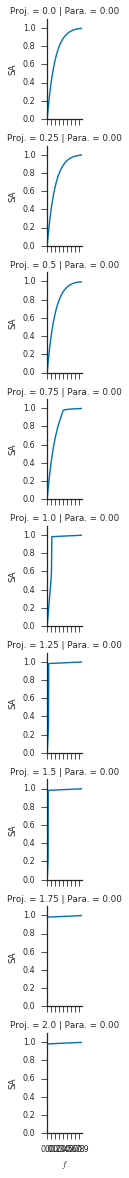

In [4]:
space=.2
g = sns.FacetGrid(df, col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='unit', value='SA')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', 'SA')
g.set_titles("Proj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
#plt.savefig('figures/RDC_vs_f_maxr.pdf')
#g.axes[0,0].set_xlim([-0.01, 0.3])
g.axes[0,0].set_ylim([0, 1.1])
#plt.savefig('figures/RDC_vs_f_maxr_zoom.pdf')

In [5]:
space=.2
g = sns.FacetGrid(df.query('f<0.4'), col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='unit', value='SGC')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', 'SGC')
g.set_titles("Proj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
#plt.savefig('figures/RDC_vs_f_maxr.pdf')
g.axes[0,0].set_xlim([-0.01, 0.4])
g.axes[0,0].set_ylim([0, 1.1])
#plt.savefig('figures/RDC_vs_f_maxr_zoom.pdf')

(0, 1.1)

[ 0.]


/home/andres/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


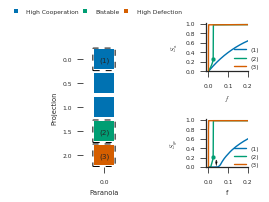

In [102]:
sns.set_palette('colorblind')
current_palette = sns.color_palette()
sns.set_context("paper", font_scale=.75)
print(df.Paranoia.unique())
df2 = df.query('Projection % 0.5 == 0')
subdf = df2.query('Projection==0 or Projection==1.5 | Projection==2')
subdf['condition'] = 100 * subdf['Projection']
subdf = subdf.sort_values('condition')

# figure and grid
plt.figure(figsize=(linewidthin, 0.7*linewidthin))
grid = plt.GridSpec(6, 6, wspace=200, hspace=0, )


sgc_mean = subdf.pivot_table(index='f', columns='condition', values='SGC').reset_index()

# bottom inset
ax = plt.subplot(grid[4:, 3:5])
sns.tsplot(subdf.query('Projection<3'), time='f', unit='unit', value='SGC', condition='condition',
           color=current_palette, ax=ax,legend=True)
ax.annotate("", xy=(0.04, 0.03), xycoords='data', xytext=(0.04, 0.15), textcoords='data',
            arrowprops=dict(color='black', width=0.75, headwidth=2, headlength=4),
            )

ax.scatter(sgc_mean.loc[25, 'f'], sgc_mean.loc[25, 150], c=current_palette[1])
ax.set_ylim([0, 1.01])
ax.set_xlim([-0.01, 0.2])
ax.set_xlabel('f')
ax.set_ylabel('$S_{gc}$')

ax.legend(['(1)', '(2)', '(3)'], bbox_to_anchor=(0.81, 0.27), bbox_transform=plt.gcf().transFigure)
ax.set_xticks([0, 0.1, 0.2])


sa_mean = subdf.pivot_table(index='f', columns='condition', values='SA').reset_index()

# top inset
ax = plt.subplot(grid[0:2, 3:5], sharex=ax)
sns.tsplot(subdf, time='f', unit='unit', value='SA', condition='condition', color=current_palette, n_boot=2, ax=ax, legend=True)
ax.scatter(sa_mean.loc[25, 'f'], sa_mean.loc[25, 150], c=current_palette[1])
ax.legend(['(1)', '(2)','(3)'], loc='upper right', bbox_to_anchor=(.81, 0.8), bbox_transform=plt.gcf().transFigure)
ax.set_xlim([-0.01, 0.2])
ax.set_xlabel('$f$')
ax.set_ylabel('$S_a$')
ax.set_ylim([-0, 1.01])
ax.set_xticks([0, 0.1, 0.2])
#ax.plot([0, 0.09], [0, 0.09], '--')


sns.despine()



import matplotlib.patches as mpatches
pv = df2.pivot_table(index='Projection', columns='Paranoia', values='RDC')
for (projection, paranoia), subdf in df2.groupby(['Projection', 'Paranoia']):
    pepe = pd.pivot_table(subdf, index='f', values=['RDC', 'SGC', 'SA']).reset_index()
    pepe['diff'] = pepe['SA'].diff() / pepe['f'].diff()
    pepe['jump'] = pepe['diff'] > 100
    if not pepe.iloc[2:]['jump'].any():
        if (pepe.loc[pepe['f']>0, 'SA'] > 0.2).all():
            pv.loc[projection, paranoia] = 'High Defection'
        else:
            pv.loc[projection, paranoia] = 'High Cooperation'
    else:
        pv.loc[projection, paranoia] = 'Bistable'
    if (pepe.loc[pepe['f']>0, 'SA'] > 0.2).all():
        pv.loc[projection, paranoia] = 'High Defection'

pepe = pv.unstack().reset_index()
pepe = pepe.rename(columns={0: 'System'})
pars = {k: v + 0.5 for v, k in enumerate(np.unique(pepe['Paranoia']))}
pepe['Paranoia'] = pepe['Paranoia'].map(pars)

pro = {k: 4.5- v for v, k in enumerate(np.unique(pepe['Projection']))}
pepe['Projection'] = pepe['Projection'].map(pro)
aspect = 0.7
frac = 0.55
#fig = plt.figure(figsize=(linewidthin, linewidthin*aspect))
#ax = fig.add_axes([0.16, 0.2, frac, frac/aspect])
grouped = pepe.groupby('System')

pad = 0.17
ad = 0.02
aspect = 1
#sns.set_context('paper', font_scale=0.75)
ax0 = plt.subplot(grid[1:,0:2])
#ax0 = fig.add_axes()#[pad, 7./24+pad/aspect, 2./3-pad-ad, 2./3-(pad+ad)/aspect]
for sname in ['High Cooperation', 'Bistable', 'High Defection']:
    sgr = grouped.get_group(sname)
    ax0.plot(sgr['Paranoia'], sgr['Projection'], marker='s', label=sname, linestyle='None', markersize=20)
plt.xlim([0, 1])
plt.ylim([0, 5])
lgd = plt.legend(loc=10, markerscale=0.2, bbox_to_anchor=(0.3, 1.3), ncol=3, columnspacing=0)
plt.xticks([0.5], [0.0])
plt.yticks(np.arange(0.5,5.5), np.arange(2,-.25,-0.5));
plt.xlabel('Paranoia')
plt.ylabel('Projection');

fancybox = mpatches.FancyBboxPatch([.25, 4.05], 0.5, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([.25, 1.05], 0.5, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([.25, .05], 0.5, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)

ax0.add_patch(fancybox)

ax0.annotate("(1)", xy=(0.04, 0.03), xytext=(0.4, 4.4), textcoords='data')
ax0.annotate("(2)", xy=(0.04, 0.03), xytext=(.4, 1.4), textcoords='data')
ax0.annotate("(3)", xy=(0.04, 0.03), xytext=(.4, 0.4), textcoords='data')

sns.despine(left=True, bottom=True, ax=ax0)
#plt.tight_layout()

plt.savefig('figures/stabilitymap_cooppr_robust3.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

### More Memory

In [14]:
df = pd.read_pickle('data/percolation2d_last_maxr_cooppr_pr_vs_cd_more_memory2.pkl')
df = df.rename(columns={'AlD':'AllD', 'Proyection': 'Projection', 'Defections': 'RDC'})
df['f'] = df['AllD'] / number_of_nodes
df['SGC'] = df['gigant component size'] / number_of_nodes
df['SA'] = df['size of active nodes'] / number_of_nodes
df['isna'] = df.SA.isnull()
df['unit'] = df['seed'] + 0.1 * df['network_seed']
df = df.dropna()
print(df.isnull().sum())
display(df[df['AllD']==1].pivot_table(index='Projection', columns='Paranoia',
                                      values='seed', aggfunc=len, margins=True))
display(df.head())
print(df.AllD.min())
print(df.f.min())

AllD                     0
Cooperations             0
RDC                      0
Parameters               0
Paranoia                 0
Prior                    0
Projection               0
Time                     0
gigant component size    0
network_seed             0
seed                     0
size of active nodes     0
f                        0
SGC                      0
SA                       0
isna                     0
unit                     0
dtype: int64


Paranoia    0.0  0.214699558768  0.34875477484  0.368992888203  All
Projection                                                         
0.0          50              50             50              50  200
0.25         50              50             50              50  200
0.5          50              50             50              50  200
0.75         50              50             50              50  200
All         200             200            200             200  800

AllD  Cooperations       RDC                  Parameters  Paranoia  \
0     0      0.956016  0.043984  Beta(12, 2), Paranoia 0.35  0.348755   
1     1      0.956006  0.043994  Beta(12, 2), Paranoia 0.35  0.348755   
2   101      0.950929  0.049071  Beta(12, 2), Paranoia 0.35  0.348755   
3   201      0.945467  0.054533  Beta(12, 2), Paranoia 0.35  0.348755   
4   301      0.938914  0.061086  Beta(12, 2), Paranoia 0.35  0.348755   

     Prior  Projection  Time  gigant component size  network_seed  seed  \
0  (12, 2)        0.75  1999                     37             4     6   
1  (12, 2)        0.75  1999                     37             4     6   
2  (12, 2)        0.75  1999                     63             4     6   
3  (12, 2)        0.75  1999                    183             4     6   
4  (12, 2)        0.75  1999                    726             4     6   

   size of active nodes        f      SGC       SA   isna  unit  
0                  4362  0.00000  0.00037  0.04362  False   6.4  
1                  4365  0.00001  0.00037  0.04365  False   6.4  
2                  5432  0.00101  0.00063  0.05432  False   6.4  
3                  6564  0.00201  0.00183  0.06564  False   6.4  
4                  7877  0.00301  0.00726  0.07877  False   6.4

0
0.0


(0, 1.1)

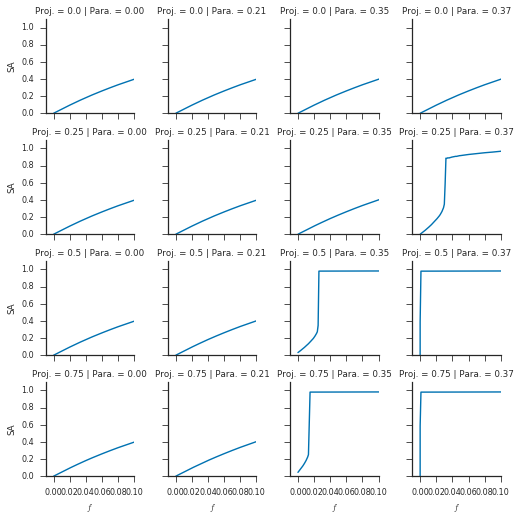

In [15]:
space=.2
g = sns.FacetGrid(df, col='Paranoia', row='Projection',
                  row_order=sorted(df['Projection'].unique()),
                  col_order=sorted(df['Paranoia'].unique()), xlim=(0., 1), ylim=(0, 1.1), despine=True,
                  size=(textwidthin-space)/4, aspect=1)
g.map_dataframe(sns.tsplot, time='f', unit='unit', value='SA')
g.fig.subplots_adjust(wspace=space, hspace=space)
g.set_axis_labels('$f$', 'SA')
g.set_titles("Proj. = {row_name} | Para. = {col_name:.2f}")
plt.tight_layout()
#plt.savefig('figures/RDC_vs_f_maxr.pdf')
g.axes[0,0].set_xlim([-0.01, 0.1])
g.axes[0,0].set_ylim([0, 1.1])
#plt.savefig('figures/RDC_vs_f_maxr_zoom.pdf')

In [25]:
sns.set_palette('colorblind')
current_palette = sns.color_palette()
sns.set_context("paper", font_scale=.75)
print(sorted(df.Paranoia.unique()))
subdf = df.query('(Paranoia==0 & Projection==0) or (Projection==0.75 & Paranoia> 0.34 & Paranoia < 0.36) | (Projection==0.75 & Paranoia> 0.36)')
subdf['condition'] = 100 * subdf['Projection'] + np.round(subdf['Paranoia'], 2)
subdf = subdf.sort_values('condition')

# figure and grid
plt.figure(figsize=(linewidthin, 0.7*linewidthin))
grid = plt.GridSpec(6, 6, wspace=200, hspace=0, )


sgc_mean = subdf.pivot_table(index='f', columns='condition', values='SGC').reset_index()

# bottom inset
ax = plt.subplot(grid[4:, 4:])
sns.tsplot(subdf, time='f', unit='unit', value='SGC', condition='condition',
           color=current_palette, ax=ax,legend=True)
ax.annotate("", xy=(0.05, 0.03), xycoords='data', xytext=(0.05, 0.15), textcoords='data',
            arrowprops=dict(color='black', width=0.75, headwidth=2, headlength=4),
            )

ax.scatter(sgc_mean.loc[14, 'f'], sgc_mean.loc[14, 75.35], c=current_palette[1])
ax.set_ylim([0, 1.01])
ax.set_xlim([-0.01, 0.09])
ax.set_xlabel('f')
ax.set_ylabel('$S_{gc}$')

ax.legend(['(1)', '(2)','(3)'], bbox_to_anchor=(0.95, 0.38), bbox_transform=plt.gcf().transFigure)
ax.set_xticks([0, 0.04, 0.08])


sa_mean = subdf.pivot_table(index='f', columns='condition', values='SA').reset_index()

# top inset
ax = plt.subplot(grid[0:2, 4:], sharex=ax)
sns.tsplot(subdf, time='f', unit='unit', value='SA', condition='condition', color=current_palette, n_boot=2, ax=ax, legend=True)
ax.scatter(sa_mean.loc[14, 'f'], sa_mean.loc[14, 75.35], c=current_palette[1])
ax.legend(['(1)', '(2)','(3)'], loc='upper right', bbox_to_anchor=(.95, 0.89), bbox_transform=plt.gcf().transFigure)
ax.set_xlim([-0.01, 0.09])
ax.set_xlabel('$f$')
ax.set_ylabel('$S_a$')
ax.set_ylim([-0, 1.01])
ax.set_xticks([0, 0.04, 0.08])
ax.plot([0, 0.09], [0, 0.09], '--')


sns.despine()



import matplotlib.patches as mpatches
pv = df.pivot_table(index='Projection', columns='Paranoia', values='RDC')
for (projection, paranoia), subdf in df.groupby(['Projection', 'Paranoia']):
    pepe = pd.pivot_table(subdf, index='f', values=['RDC', 'SGC', 'SA']).reset_index()
    pepe['diff'] = pepe['SA'].diff() / pepe['f'].diff()
    pepe['jump'] = pepe['diff'] > 100
    #print(projection, paranoia, pepe.query('f<0.01')[['f', 'SA']])
    if not pepe.iloc[2:]['jump'].any():
        if (pepe.loc[pepe['f']>0, 'SA'] > 0.2).all():
            pv.loc[projection, paranoia] = 'High Defection'
        else:
            pv.loc[projection, paranoia] = 'High Cooperation'
    else:
        pv.loc[projection, paranoia] = 'Bistable'
    if (pepe.loc[pepe['f']>0, 'SA'] > 0.2).all():
        pv.loc[projection, paranoia] = 'High Defection'

pepe = pv.unstack().reset_index()
pepe = pepe.rename(columns={0: 'System'})
pars = {k: v + 0.5 for v, k in enumerate(np.unique(pepe['Paranoia']))}
pepe['Paranoia'] = pepe['Paranoia'].map(pars)

pro = {k: 3.5- v for v, k in enumerate(np.unique(pepe['Projection']))}
pepe['Projection'] = pepe['Projection'].map(pro)
aspect = 0.7
frac = 0.55
#fig = plt.figure(figsize=(linewidthin, linewidthin*aspect))
#ax = fig.add_axes([0.16, 0.2, frac, frac/aspect])
grouped = pepe.groupby('System')

pad = 0.17
ad = 0.02
aspect = 1
#sns.set_context('paper', font_scale=0.75)
ax0 = plt.subplot(grid[1:,:4])
#ax0 = fig.add_axes()#[pad, 7./24+pad/aspect, 2./3-pad-ad, 2./3-(pad+ad)/aspect]
for sname in ['High Cooperation', 'Bistable', 'High Defection']:
    sgr = grouped.get_group(sname)
    ax0.plot(sgr['Paranoia'], sgr['Projection'], marker='s', label=sname, linestyle='None', markersize=27)
plt.xlim([0, 4])
plt.ylim([0, 4])
lgd = plt.legend(loc=10, markerscale=0.2, bbox_to_anchor=(0.3, 1.1), ncol=3, columnspacing=0)
plt.xticks([0.5, 1.5, 2.5, 3.5], [0.0, 0.21, 0.35, 0.37])
plt.yticks([0.5, 1.5, 2.5, 3.5], [0.75, 0.5, 0.25, 0]);
plt.xlabel('Paranoia')
plt.ylabel('Projection');

fancybox = mpatches.FancyBboxPatch([.05, 3.05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([2.05, .05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)
fancybox = mpatches.FancyBboxPatch([3.05, .05], 0.9, 0.9, boxstyle=mpatches.BoxStyle("Round", pad=0.02),
                                   edgecolor=[0, 0, 0], fill=False, alpha=1, linestyle='--', linewidth=1)
ax0.add_patch(fancybox)

ax0.annotate("(1)", xy=(0.04, 0.03), xytext=(0.38, 3.43), textcoords='data')
ax0.annotate("(2)", xy=(0.04, 0.03), xytext=(2.38, 0.43), textcoords='data')
ax0.annotate("(3)", xy=(0.04, 0.03), xytext=(3.38, 0.43), textcoords='data')

sns.despine(left=True, bottom=True, ax=ax0)
#plt.tight_layout()

plt.savefig('figures/stabilitymap_robust_cooppr_memory.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

[0.0, 0.21469955876757674, 0.34875477484037409, 0.36899288820276965]


/home/andres/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
